In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# 9.1 matplotlib API入门

In [2]:
data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

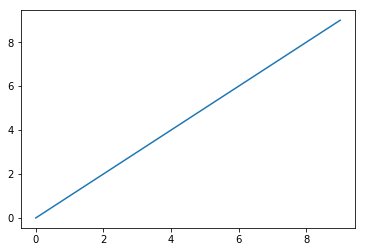

In [4]:
plt.plot(data)

# figure和subplot

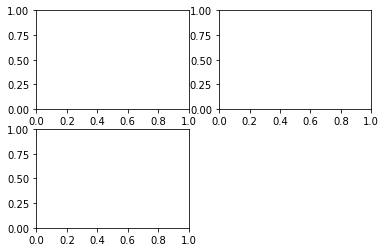

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)   #向空的figure中添加subplot，命令的意思是图象是2x2的，目前选中的是4个subplot中的第一个
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

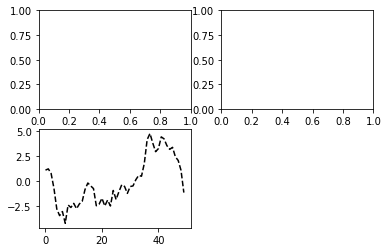

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)   #向空的figure中添加subplot，命令的意思是图象是2x2的，目前选中的是4个subplot中的第一个
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')    #最后画图会画在最后一个用过的subplot上进行绘制

In [15]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)  #在ax1上画直方图

(array([ 1.,  0.,  0.,  0.,  4.,  4.,  6.,  8., 10.,  2., 10., 11., 12.,
         9.,  5.,  6.,  3.,  4.,  4.,  1.]),
 array([-3.12492735, -2.85141061, -2.57789388, -2.30437714, -2.0308604 ,
        -1.75734367, -1.48382693, -1.2103102 , -0.93679346, -0.66327672,
        -0.38975999, -0.11624325,  0.15727348,  0.43079022,  0.70430695,
         0.97782369,  1.25134043,  1.52485716,  1.7983739 ,  2.07189063,
         2.34540737]),
 <a list of 20 Patch objects>)

In [16]:
ax2.scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))  #在ax2上画散点图

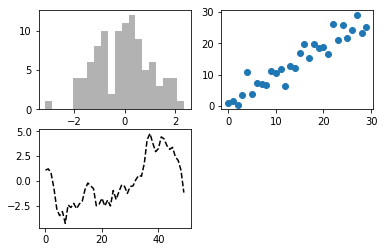

In [17]:
fig    #各图显示如下

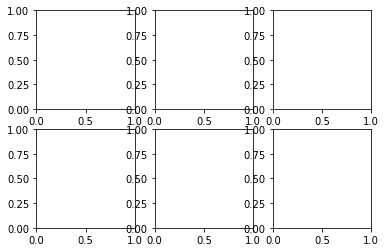

In [18]:
fig, axes = plt.subplots(2,3)   #构成两行散列的子图

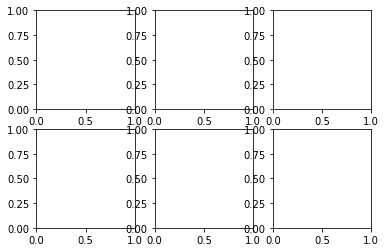

In [19]:
fig   #显示完整的图

In [20]:
axes   #通过axes来进行索引

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA31F5ACF8>,
      dtype=object)

In [21]:
axes[0,1]  #索引例子

# 调整subplot周围的间距

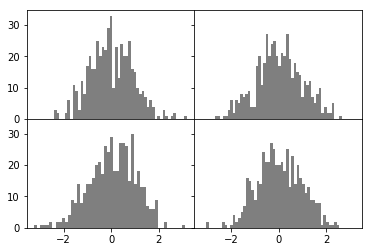

In [25]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# 颜色、标记和线型

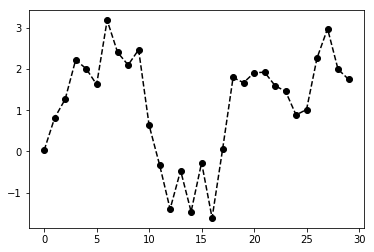

In [26]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')   #o表示标出数据点的位置（注：标记类型和线型都必须放在颜色后面）

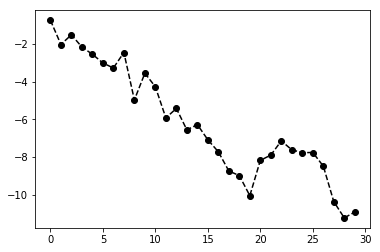

In [27]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')   #和上面的那条代码会产生相同的效果，但是这个代码形式更明确

In [28]:
data = np.random.randn(30).cumsum()

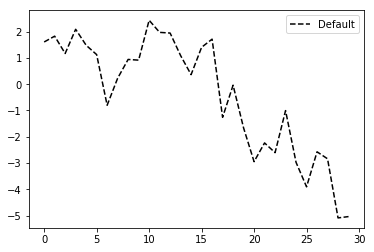

In [31]:
plt.plot(data, 'k--', label='Default')
plt.legend()   #否则label不会显示出来

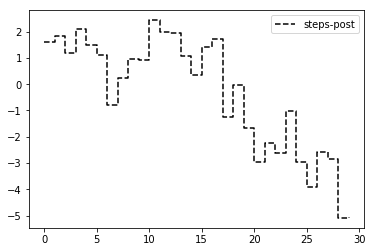

In [32]:
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

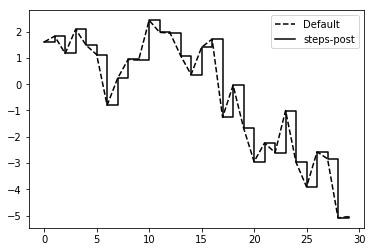

In [34]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

# 刻度、标签和图例

# 设置标题、轴标签、刻度以及刻度标签

In [35]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [36]:
ax = fig.add_subplot(1, 1, 1)

In [37]:
ax.plot(np.random.randn(1000).cumsum())

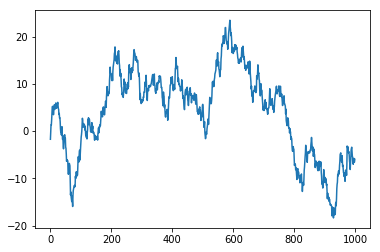

In [38]:
fig

In [39]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])   #表明需要将刻度放在数据范围中的哪些位置

In [40]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')   #可以将任何其他值作为标签，rotation选项表明x刻度标签倾斜30度，fontsize表示字号

In [41]:
ax.set_title('My first matplotlib plot')   #为图设置标题

Text(0.5,1,'My first matplotlib plot')

In [42]:
ax.set_xlabel('Stages')   #为x轴设置名称

Text(0.5,3.2,'Stages')

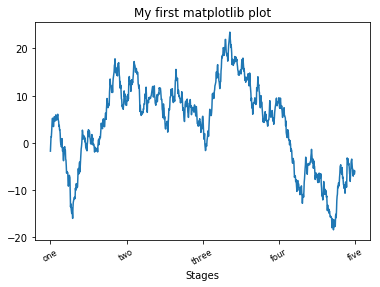

In [43]:
fig  #最终效果

# 添加图例

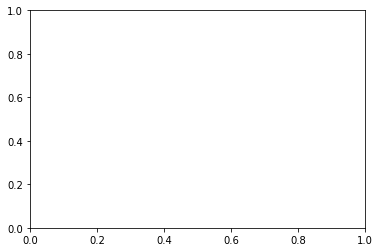

In [44]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)

In [45]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

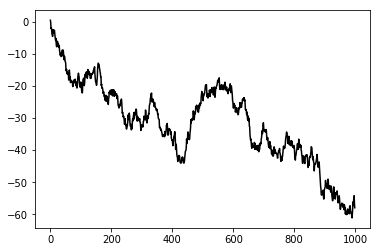

In [46]:
fig

In [48]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

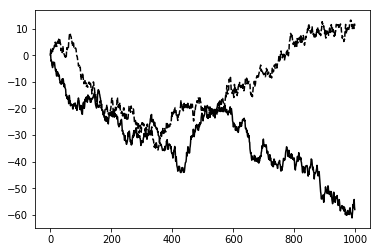

In [49]:
fig

In [50]:
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

In [59]:
ax.legend(loc='best')   #使图例能都显示出来

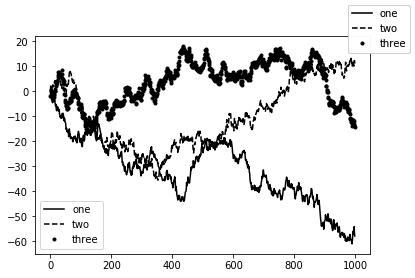

In [60]:
fig  #此处显示两个是因为之前操作出错了（增加了两次图例，且位置参数loc填写的内容不同造成了）

# 注解以及在Subplot上绘图

In [61]:
from datetime import datetime

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

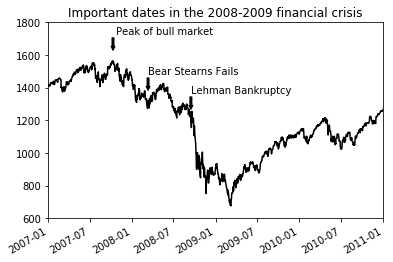

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('C:/Users/zoe_x/Documents/python/pydata-book-2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007,10,11),' Peak of bull market'),
    (datetime(2008,3,12), 'Bear Stearns Fails'),
    (datetime(2008,9,15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:   #下面的命令用来在三个地方绘制标签
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
#zoom in on 2007=2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

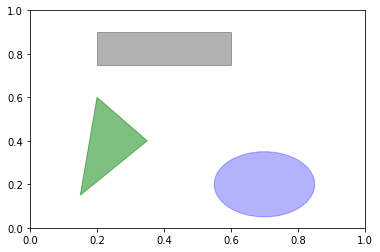

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color = 'g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# 将图表保存到文件

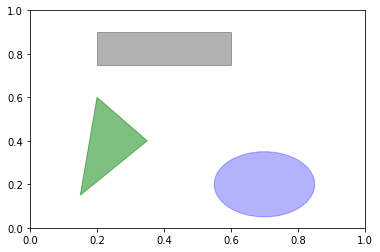

In [76]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color = 'g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('C:/Users/zoe_x/Documents/python/picture2.png', dpi=400)  #这一条保存图片的命令要和之前的画图命令放在一起才有效果（同个小窗）

# matplotlib配置

In [78]:
plt.rc('figure', figsize=(10,10))  #要将全局的图像默认大小设置为10*10

In [84]:
font_options = {'family':'monospace',    #将这些参数选项编写成字典
               'weight': 'bold',
               'size': 'small'}

# 9.2 使用pandas和seaborn绘图

# 线型图

In [85]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

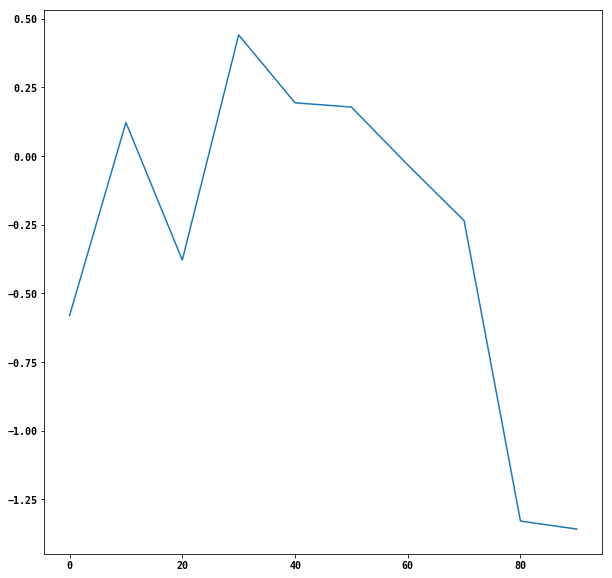

In [86]:
s.plot()  #series的索引会被传给matplotlib用来绘制x轴

In [87]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
              columns=['A', 'B', 'C', 'D'],
              index=np.arange(0, 100, 10))

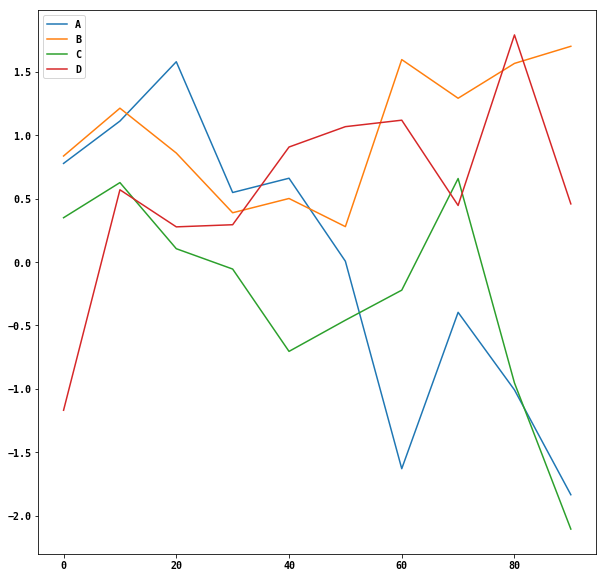

In [88]:
df.plot()  #会为各列绘制一条线，并且自动创建图例

# 柱状图

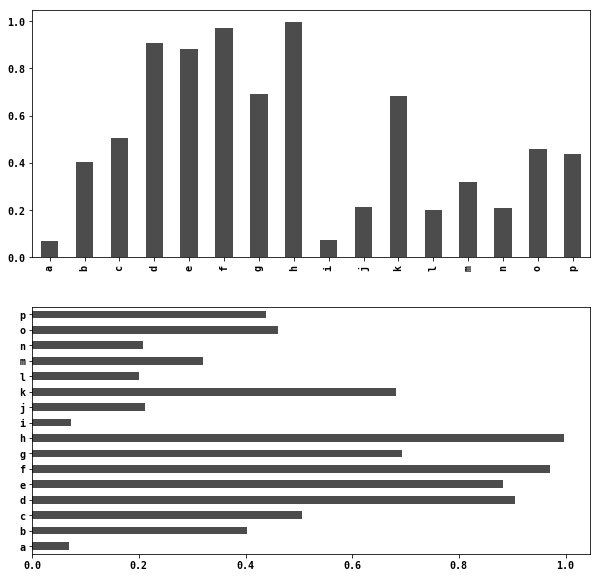

In [91]:
fig, axes = plt.subplots(2,1) #绘制两行一列的图
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)  #绘制一行一列的图为水平柱状图
data.plot.barh(ax=axes[1], color='k', alpha=0.7)  #绘制二行一列的图为垂直柱状图
plt.savefig('C:/Users/zoe_x/Documents/python/picture3.png', dpi=400, bbox_inches='tight')     

In [95]:
df = DataFrame(np.random.rand(6,4),
              index=['one', 'two', 'three', 'four', 'five', 'six'],
              columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [96]:
df

Genus,A,B,C,D
one,0.399163,0.604384,0.636748,0.690480
two,0.776865,0.812210,0.647519,0.229881
three,0.233387,0.855410,0.562430,0.679052
four,0.758397,0.199497,0.323444,0.019703
five,0.120128,0.974936,0.904025,0.246306
six,0.232658,0.150475,0.956520,0.493984


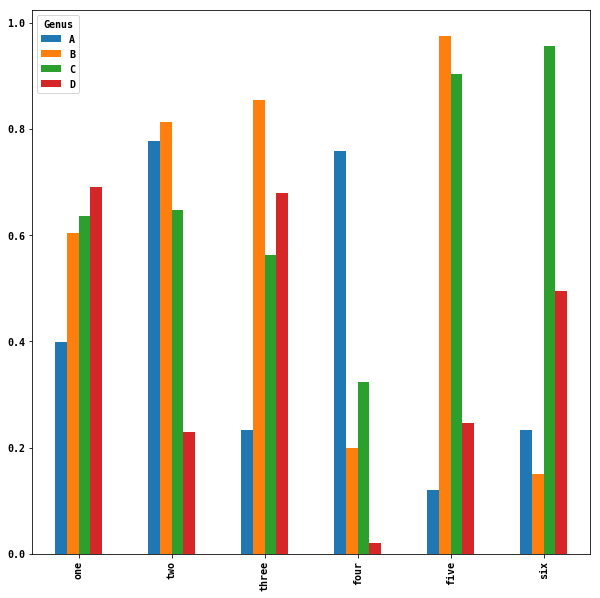

In [97]:
df.plot.bar()  #每一行的值被分为一组，并排显示，而各列的名称（columns的名称）被用作了图例的标题

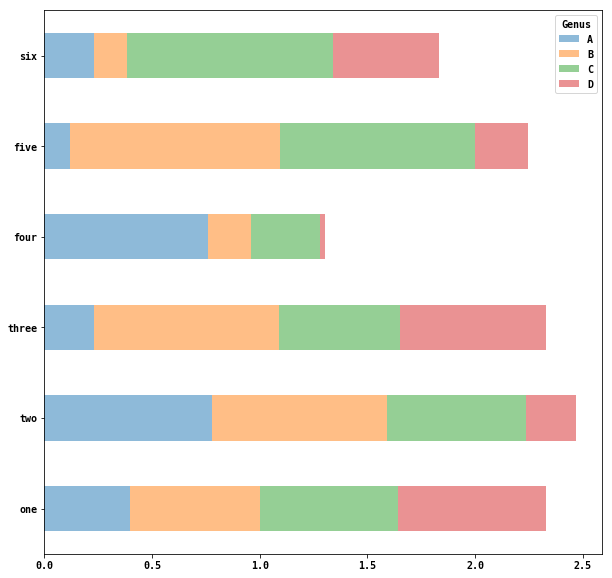

In [99]:
df.plot.barh(stacked=True, alpha=0.5)   #通过stacked生成堆积柱状图

In [101]:
tips = pd.read_csv(r'C:\Users\zoe_x\Documents\python\pydata-book-2nd-edition\examples\tips.csv')

In [102]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [103]:
party_counts = pd.crosstab(tips['day'], tips['size']) #取两列,统计分组频数

In [104]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [105]:
party_counts = party_counts.loc[:,2:5]

In [106]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [107]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)  #数据规格化，使得各行的和为1(这样统计出来就是频率)

In [108]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


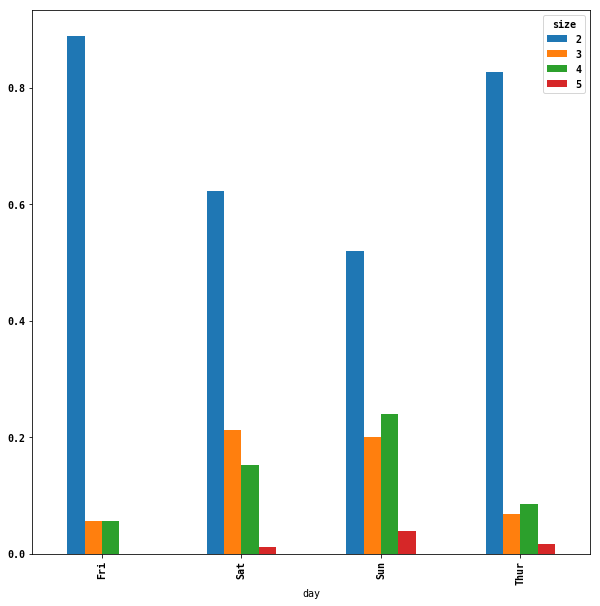

In [109]:
party_pcts.plot.bar()

In [110]:
import seaborn as sns

In [111]:
tips['tip_pct']=tips['tip']/(tips['total_bill']-tips['tip'])   #增加一列（小费比例）

In [112]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


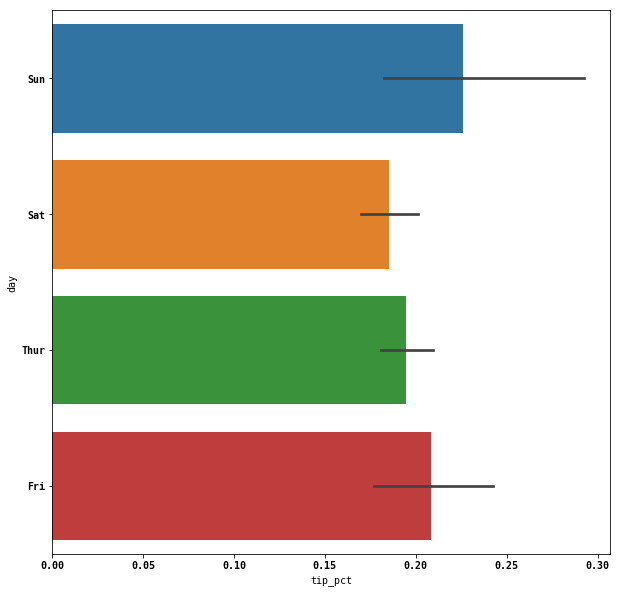

In [114]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

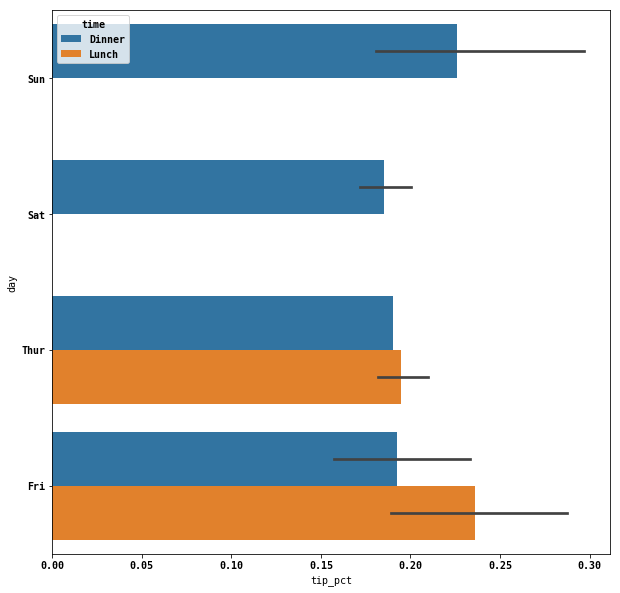

In [115]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [116]:
sns.set()

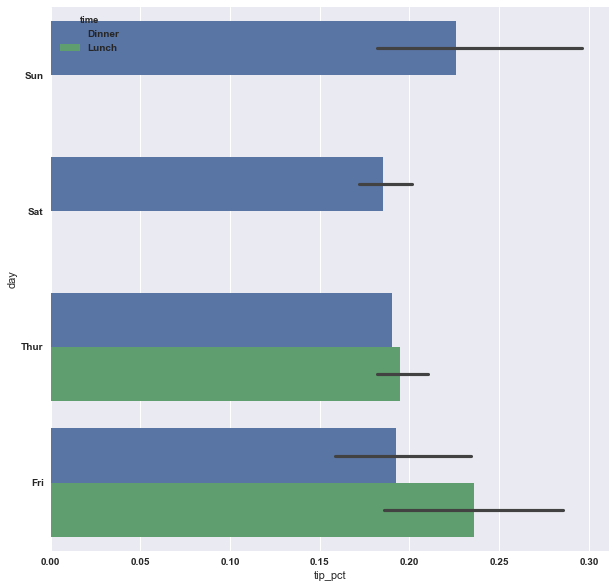

In [117]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

# 直方图和密度图

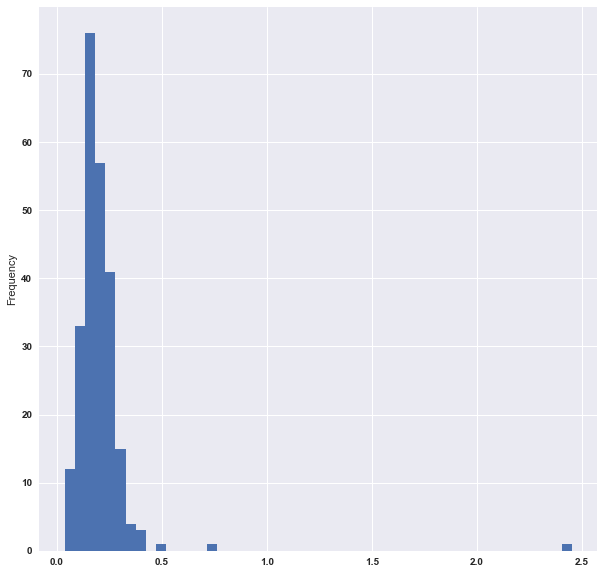

In [118]:
tips['tip_pct'].plot.hist(bins=50)  #获得小费占消费总额百分比（就是tip_pct这一列的值）的直方图

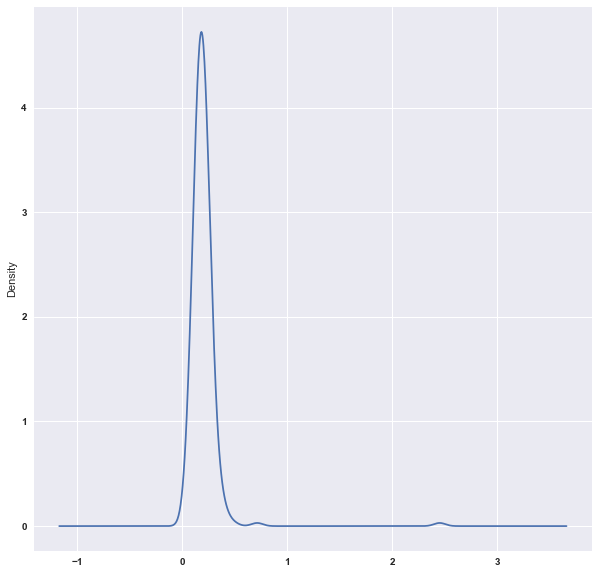

In [119]:
tips['tip_pct'].plot.density()  #生成密度图

In [120]:
comp1 = np.random.normal(0, 1, size=200)

In [122]:
comp2 = np.random.normal(10, 2, size=200)

In [123]:
values = Series(np.concatenate([comp1, comp2])) #拼接数组

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


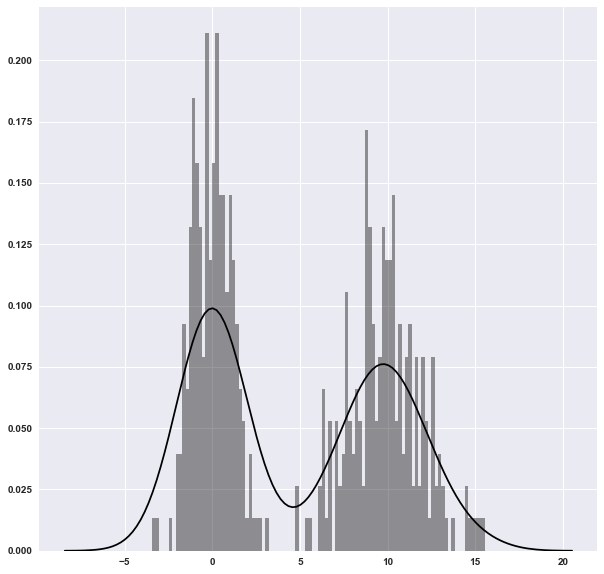

In [124]:
sns.distplot(values, bins=100, color='k')  #形成一个双峰分布

# 散点图或点图

In [125]:
macro = pd.read_csv(r'C:\Users\zoe_x\Documents\python\pydata-book-2nd-edition\examples\macrodata.csv')

In [126]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [128]:
data = macro[['cpi','m1','tbilrate','unemp']] #取四列

In [129]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [130]:
trans_data = np.log(data).diff().dropna()  #数据取对数、行间差分、删去空值

In [131]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


In [132]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


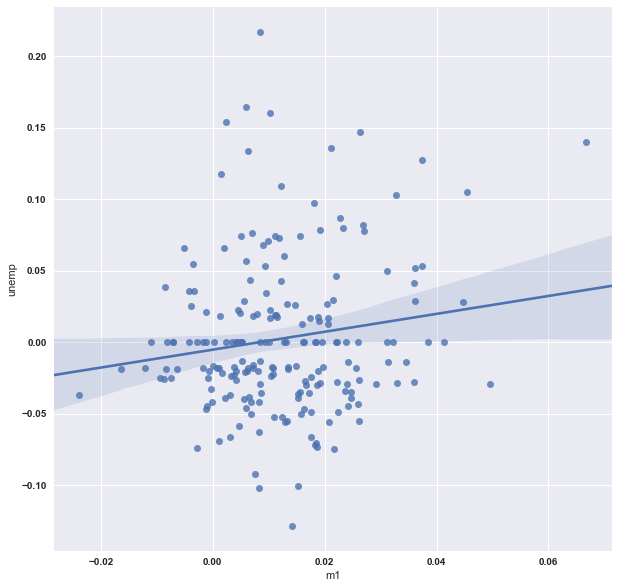

In [133]:
sns.regplot('m1', 'unemp', data=trans_data)  #画出散布图和一条线性回归的线

Text(0.5,1,'Changes in log m1 verse log unemp')

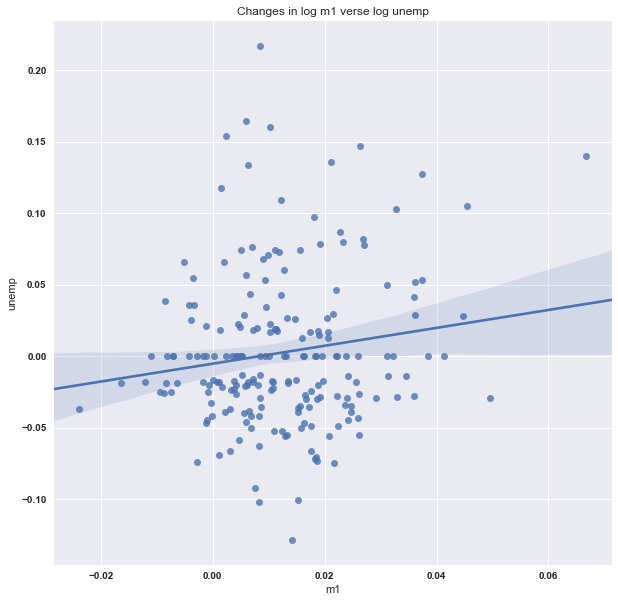

In [135]:
sns.regplot('m1', 'unemp', data=trans_data)  #画出散布图和一条线性回归的线
plt.title('Changes in log %s verse log %s' % ('m1', 'unemp'))

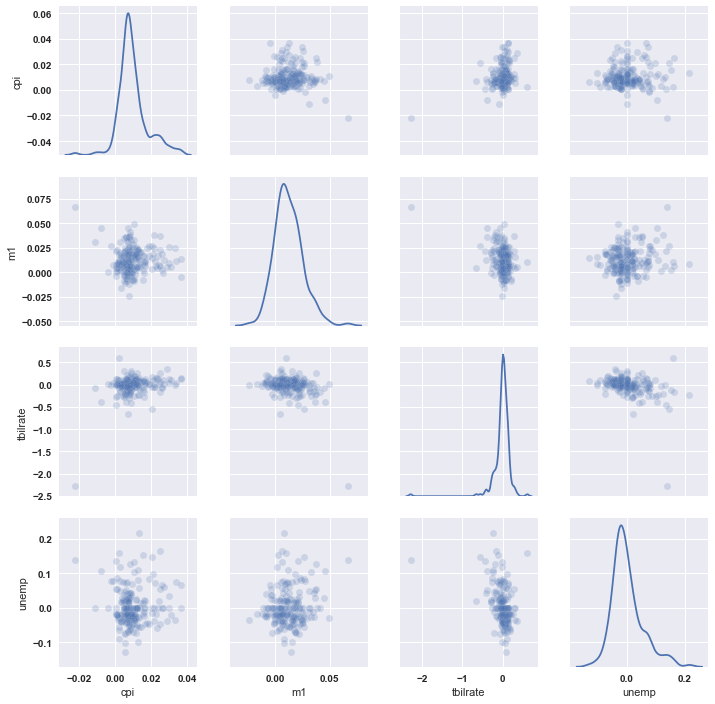

In [136]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2}) #可以看到魅族变量的散布图

# 分面网格（facet grid）和类型数据

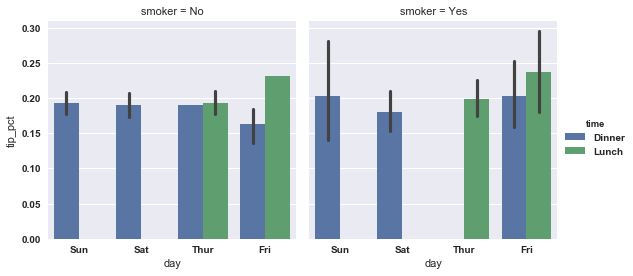

In [138]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct<1])

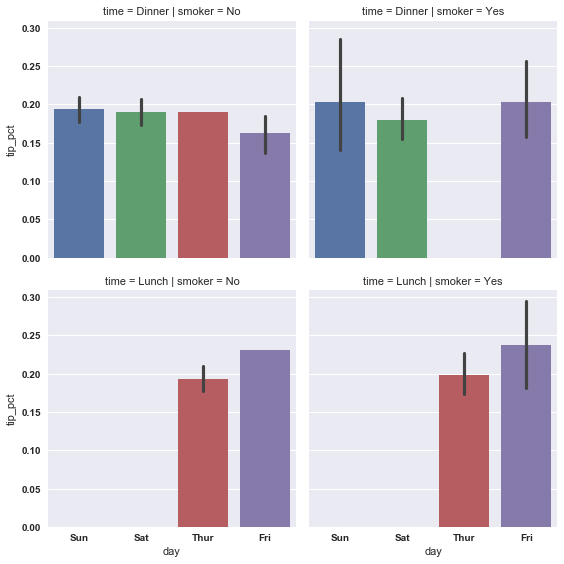

In [139]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct<1])

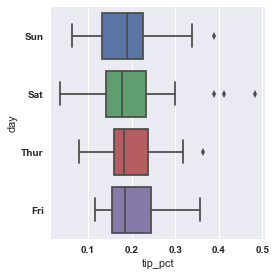

In [140]:
sns.factorplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct<0.5])